# Ejemplo real de uso con información de la EOD 2012

La mayoria de los ejemplos fueron obtenidos de una presentación de **Eduardo Graells-Garrido**

**Es recomendable trabajar este archivo en Colab de Google**

En este ejemplo se analiza la encuesta Origen Destino de Santiago, realizada el año 2012. 

La Encuesta Origen-Destino de Santiago, efectuada por última vez el año 2012, es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta:

> ¿Qué viajes hiciste ayer?

Las personas encuestadas responden a través de un diario de viaje. En este diario incluyen todos los datos pertinentes de sus viajes: a qué hora lo iniciaron, a qué hora terminaron, los puntos de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También incluye información socio-demográfica de cada persona que responde.

La encuesta es representativa a nivel comunal. Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones extrapolables al barrio completo.

## Datasets

En este ejemplo trabajaremos con la base de datos de la EOD disponible en la página de datos del Gobierno disponible en el siguiente link.

  * [Encuesta Origen-Destino Santiago 2012](http://datos.gob.cl/dataset/31616)

Con el comando **git clone** descargaremos a la memoria de este notebook la información requerida para trabajar.

In [1]:
!git clone https://github.com/carnby/carto-en-python.git 

Cloning into 'carto-en-python'...
remote: Enumerating objects: 281, done.
remote: Total 281 (delta 0), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (281/281), 131.76 MiB | 584.00 KiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (260/260), done.



## Previo

Primero vamos a importar alguna de la librerías descritas en el primer notebook de este capíutlo.

Usaremos:

* `numpy` (vectores)
* `pandas`(DataFrames)
* `matplotlib` (visualización de bajo nivel)
* `seaborn` (visualización estadística). 

Ya tienen experiencia con estas cuatro bibliotecas, pero con este ejemplo profundizaremos un poco más en las dos últimas.

## `matplotlib`

`matplotlib` es una biblioteca de **bajo nivel** para visualización en Python, con un paradigma **imperativo**.

  * De bajo nivel quiere decir que entrega las primitivas gráficas necesarias para crear visualizaciones más complejtas.
  * Imperativo quiere decir que se focaliza en las instrucciones que recibe la biblioteca, ya que no _abstrae_ las operaciones o codificaciones visuales de modo que operemos sobre éstas.

In [ ]:
!pip3 install matplotlib

## `seaborn`

`seaborn` es una biblioteca que se construye _sobre_ `matplotlib`, y que incluye gráficos estadísticos y algunas funcionalidades avanzadas de modelamiento y reducción de complejidad. Esto permite _hacer más con menos código_. 

Al mismo tiempo, `seaborn` incluye opciones para trabajar con la codificación visual de manera más efectiva que `matplotlib`, por ejemplo, a través de la facilitación de elección de paletas de colores, o de la detección de parámetros siguiendo buenas prácticas.

Y para completar más esta oferta, `seaborn` es directamente compatible con `pandas`. `matplotlib` también, pero no de manera nativa, por lo que todo lo que se relaciona con `pandas` requiere más trabajo.

En el ejemplo de abajo vemos que no solamente hizo el gráfico, sino que incluso etiquetó automáticamente el eje $x$.

Sin embargo, en `seaborn` la idea no es reemplazar los métodos de `matplotlib`. En realidad, lo que haremos será trabajar de manera diferente. Lo primero que debemos hacer es cambiar el formato de los datos. 

En `seaborn` se trabaja con **tidy data**. O datos ordenaditos.

(Aquí hay dos explicaciones interesantes sobre _tidy data_: en [Python](http://www.jeannicholashould.com/tidy-data-in-python.html). El paper que explica el razonamiento detrás está [aquí](http://courses.had.co.nz.s3-website-us-east-1.amazonaws.com/12-rice-bdsi/slides/07-tidy-data.pdf)).

In [ ]:
!pip3 install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Esto configura la apariencia de los gráficos utilizando configuraciones de seaborn
sns.set(context='poster', style='ticks', palette='inferno')

# Esto es una instrucción de Jupyter que hace que los gráficos se desplieguen en el notebook
%matplotlib inline

# la encuesta tiene tantas columnas que hacemos esto para imprimirlas todas
pd.set_option('max_columns', 1000)

## Los datos: endimiento y limpieza

Esto involucra:

  * Inspeccionar el contenido de la base de datos para saber qué cargar.
  * Ajustar las perillas de los métodos para cargar datos, de modo que lean lo que queremos que leamos, y no se equivoquen.
  * Realizar visualización exploratoria para saber si está todo en orden.
  * Eliminar observaciones que no sirven, sea porque vienen _sucias_, _incompletas_, o bien no son relevantes para nuestro análisis.
  
  
El siguiente comando muestra los parámetros de la EOD.

In [4]:
!ls ./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/

Actividad.csv              ModoDifusion.csv
ActividadDestino.csv       ModoMotor.csv
ActividadEmpresa.csv       ModoPriPub.csv
AdultoMayor.csv            ModoestacionaBicicleta.csv
Autopista.csv              NoUsaAutopista.csv
CirculacionBicicleta.csv   NoUsaTransantiago.csv
CodigoTiempo.csv           NoViaja.csv
Combustible.csv            Ocupacion.csv
Comuna.csv                 PaseEscolar.csv
Comunas.csv                Periodo.csv
ConoceSantiago.csv         Propiedad.csv
Discapacidad.csv           PropiedadBicicleta.csv
Donde Estudia.csv          PropiedadVehiculo.csv
EdadVehiculo.csv           Proposito.csv
EstacionMetro.csv          PropositoAgregado.csv
EstacionMetroCambio.csv    RecorridoTransantiago.csv
EstacionTren.csv           Relacion.csv
Estaciona.csv              Relacion.csvtest
EstacionaBicicleta.csv     Sector.csv
Estudios.csv               SelloVerde.csv
Formapago.csv              Sexo.csv
HorarioMetro.csv           SexoViaje.csv
IngresoImputado.csv        Temporada.c

La siguiente consulta muestra las tablas de información de la EOD.

In [5]:
!ls ./carto-en-python/input/2012_eod_stgo/EOD_STGO/

DistanciaViaje.csv Hogares.csv        ViajesDifusion.csv
Edadpersonas.csv   Tablas_parametros  personas.csv
Etapas.csv         Vehiculo.csv       viajes.csv


Si queremos visualizar, por ejemplo información de viajes:

In [6]:
trip_data = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/viajes.csv', sep=';')
trip_data.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,"335208,7188",6288387,"338812,3125",6292391,7.0,3.0,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,"1,00000000",NaN,NaN,NaN,NaN,0.0
1,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,"338536,4375",6291928,"354267,3438",6302297,1.0,1.0,5.0,2;4,9,2,1,13:00,14:45,13:53,105.0,4.0,5.0,5.0,1.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
2,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,"354267,3438",6302297,"338536,4375",6291928,7.0,1.0,NaN,4;2,9,2,1,22:00,23:30,22:45,90.0,3.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
3,173441,17344103,1734410301,2,94.0,91.0,2.0,3.0,407,437,"338536,4375",6291928,"350841,6563",6297212,1.0,1.0,5.0,2;4,9,2,1,9:00,9:55,9:27,55.0,2.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0
4,173441,17344103,1734410302,2,91.0,94.0,3.0,2.0,437,407,"350841,6563",6297212,"338536,4375",6291928,7.0,1.0,NaN,4;2,9,2,1,19:00,21:30,20:15,150.0,5.0,4.0,10.0,2.0,"1,05276356",NaN,NaN,NaN,NaN,0.0


In [7]:
trip_data.columns

Index(['Hogar', 'Persona', 'Viaje', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo'],
      dtype='object')

Por ejemplo, notemos que las columnas ComunaOrigen y ComunaDestino tienen valores numéricos que deben ser IDs.

In [8]:
municipalities = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', sep=',')
municipalities.head()

,Id,Comuna
0,10,CALAMA
1,13,COPIAPÓ
2,19,LA SERENA
3,21,COQUIMBO
4,25,OVALLE


Entonces, seguramente las comunas de origen/destino de un viaje contienen esos valores, pero codificados.

In [9]:
trip_data.merge(municipalities, left_on='ComunaOrigen', right_on='Id').iloc[0]

Hogar                            173431
Persona                        17343102
Viaje                        1734310202
Etapas                                1
ComunaOrigen                         94
ComunaDestino                        94
SectorOrigen                          2
SectorDestino                         2
ZonaOrigen                          400
ZonaDestino                         407
OrigenCoordX                335208,7188
OrigenCoordY                    6288387
DestinoCoordX               338812,3125
DestinoCoordY                   6292391
Proposito                             7
PropositoAgregado                     3
ActividadDestino                    NaN
MediosUsados                          2
ModoAgregado                          2
ModoPriPub                            2
ModoMotor                             1
HoraIni                           22:30
HoraFin                           23:40
HoraMedia                         23:05
TiempoViaje                          70


In [10]:
def decode_column(df, fname, col_name, index_col='Id', target_col=None, value_col=None, sep=';', encoding='utf-8'):
    '''
    param :df: DataFrame del que leeremos una columna.
    param :fname: nombre del archivo que contiene los valores a decodificar.
    param :col_name: nombre de la columna que queremos decodificar.
    param :index_col: nombre de la columna en el archivo @fname que tiene los índices que codifican @col_name
    param :value_col: nombre de la columna en el archivo @fname que tiene los valores decodificados
    param :sep: carácter que separa los valores en @fname. 
    param :encoding: identificación del _character set_ que utiliza el archivo. Usualmente es utf-8, si no funciona,
                     se puede probar con iso-8859-1.
    '''
    if value_col is None:
        value_col = 'value'
        
    if target_col is None:
        target_col = col_name
        
    values_df = pd.read_csv(fname, sep=sep, index_col=index_col, names=[index_col, value_col], header=0,
                            dtype={index_col: np.float64}, encoding=encoding)
    
    src_df = df.loc[:,(col_name,)]
    
    return pd.Series(src_df.join(values_df, on=col_name)[value_col], name=target_col)

decode_column(trip_data.head(10), './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaOrigen', sep=',')

0         MAIPÚ
1         MAIPÚ
2    LAS CONDES
3         MAIPÚ
4         ÑUÑOA
5         MAIPÚ
6      SANTIAGO
7         MAIPÚ
8         MAIPÚ
9         MAIPÚ
Name: ComunaOrigen, dtype: object

Estudiaremos el uso de modos de viaje. Hay una tabla de parámetros que tiene esa información:

In [11]:
!head ./carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Modo.csv

In [12]:
trip_data.MediosUsados.value_counts()

8          33827
1          16782
17          9650
3           8924
2           5395
           ...  
12;14;4        1
3;2;4;3        1
2;4;18         1
3;3;1          1
17;3;17        1
Name: MediosUsados, Length: 406, dtype: int64

Existe otra tabla llamada ViajesDifusion:

In [13]:
trip_mode = pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/ViajesDifusion.csv', sep=';', index_col='Viaje')
trip_mode.head()

,ModoDifusion
Viaje,
1000100101,8
1000100102,8
1000100201,8
1000100202,8
1000100203,8


In [14]:
decode_column(trip_mode.sample(15), './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/ModoDifusion.csv', 'ModoDifusion', sep=';', index_col='ID', encoding='iso-8859-1')

Viaje
1749400102        Auto
1277500302       Otros
2786210102        Auto
2186720201        Auto
2181820104    Caminata
1343100104        Auto
1381410302       Otros
2374500303    Caminata
2695020401    Caminata
2494110302        Auto
2164310502        Bip!
2123310107    Caminata
2258510301        Bip!
2526820201    Caminata
2202910107       Otros
Name: ModoDifusion, dtype: object

Al parecer es más adecuada para lo que queremos.

In [15]:
trip_data.head().join(trip_mode)

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,"335208,7188",6288387,"338812,3125",6292391,7.0,3.0,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,"1,00000000",NaN,NaN,NaN,NaN,0.0,NaN
1,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,"338536,4375",6291928,"354267,3438",6302297,1.0,1.0,5.0,2;4,9,2,1,13:00,14:45,13:53,105.0,4.0,5.0,5.0,1.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
2,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,"354267,3438",6302297,"338536,4375",6291928,7.0,1.0,NaN,4;2,9,2,1,22:00,23:30,22:45,90.0,3.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
3,173441,17344103,1734410301,2,94.0,91.0,2.0,3.0,407,437,"338536,4375",6291928,"350841,6563",6297212,1.0,1.0,5.0,2;4,9,2,1,9:00,9:55,9:27,55.0,2.0,5.0,10.0,2.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,NaN
4,173441,17344103,1734410302,2,91.0,94.0,3.0,2.0,437,407,"350841,6563",6297212,"338536,4375",6291928,7.0,1.0,NaN,4;2,9,2,1,19:00,21:30,20:15,150.0,5.0,4.0,10.0,2.0,"1,05276356",NaN,NaN,NaN,NaN,0.0,NaN


Hagamos fast-forward :)

In [16]:
trip_data = (pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/viajes.csv', sep=';', index_col='Viaje')
             .assign(ComunaOrigen=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaOrigen', sep=','))
             .assign(ComunaDestino=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Comuna.csv', 'ComunaDestino', sep=','))
             .assign(SectorOrigen=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sector.csv', 'SectorOrigen', sep=';'))
             .assign(SectorDestino=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sector.csv', 'SectorDestino', sep=';'))
             .join(pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/ViajesDifusion.csv', sep=';', index_col='Viaje'))
             .assign(ModoDifusion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/ModoDifusion.csv', 'ModoDifusion', sep=';', index_col='ID', encoding='iso-8859-1'))
             .assign(Proposito=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Proposito.csv', 'Proposito', sep=';'))
             .join(pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/DistanciaViaje.csv', sep=';', index_col='Viaje'))
            )

trip_data.sample(10)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada
Viaje,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2271110202,227111,22711102,1,SANTIAGO,PUENTE ALTO,Centro,Sur-Oriente,42,703,"346740,75",6296537,354526,6284519,volver a casa,3.0,NaN,1,1,1,1,13:30,14:00,13:45,30.0,1.0,5.0,0.0,0.0,NaN,NaN,NaN,"1,482103914",NaN,NaN,Auto,14319,19803,0
1990100506,199010,19901005,1,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,Poniente,Poniente,452,453,"343014,4063","6292321,5","343417,9063",6291519,volver a casa,3.0,NaN,1,1,1,1,22:30,22:35,22:32,5.0,1.0,5.0,0.0,0.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,898,1206,0
1572410105,157241,15724101,1,LAS CONDES,LAS CONDES,Oriente,Oriente,291,291,NaN,NaN,NaN,NaN,Recreación,3.0,NaN,8,17,5,2,19:00,19:02,19:01,2.0,1.0,4.0,2.0,2.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,285,-1,1
2025720102,202572,20257201,1,PEÑALOLÉN,PEÑALOLÉN,Sur-Oriente,Sur-Oriente,472,471,"355786,9688","6295873,5","353516,5625",6295590,Al trabajo,1.0,5.0,3,2,2,1,8:21,8:45,8:33,24.0,1.0,2.0,0.0,0.0,"1,00000000",NaN,NaN,NaN,NaN,0.0,Bip!,2288,2554,0
1011710102,101171,10117101,1,SAN MIGUEL,SAN MIGUEL,Sur,Sur,639,646,346779,"6293833,5","346389,9375","6292121,5",Al trabajo,1.0,2.0,1,1,1,1,7:31,7:40,7:36,9.0,1.0,2.0,0.0,0.0,"1,04307354",NaN,NaN,NaN,NaN,0.0,Auto,1756,2101,0
2002300501,200230,20023005,1,PEÑAFLOR,PEÑAFLOR,Extensión Sur-Poniente,Extensión Sur-Poniente,860,857,"326651,1875","6279574,5","325186,4375",6280231,Al trabajo,1.0,2.0,9,18,5,2,8:00,8:30,8:15,30.0,1.0,2.0,NaN,NaN,"1,14387994",NaN,NaN,NaN,NaN,0.0,Bicicleta,1605,2121,0
1545110303,154511,15451103,1,LAS CONDES,LO BARNECHEA,Oriente,Oriente,311,324,360759,6306913,"357436,2188","6308326,5",Visitar a alguien,3.0,NaN,1,1,1,1,21:00,21:15,21:08,15.0,1.0,5.0,0.0,0.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,3611,4736,0
1217220301,121722,12172203,1,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,Poniente,Poniente,139,139,NaN,NaN,NaN,NaN,Al estudio,2.0,NaN,8,17,5,2,8:00,8:10,8:05,10.0,1.0,2.0,10.0,3.0,"1,14387994",NaN,NaN,NaN,NaN,0.0,Caminata,73,-1,1
1874010301,187401,18740103,1,MELIPILLA,MELIPILLA,Extensión Sur-Poniente,Extensión Sur-Poniente,810,806,"292819,7813",6270647,"293239,125",6270546,Por estudio,2.0,NaN,8,17,5,2,8:10,8:30,8:20,20.0,1.0,2.0,15.0,5.0,"1,14387994",NaN,NaN,NaN,NaN,0.0,Caminata,431,520,0


Todavía hay un par de asuntos que queremos resolver. Por ejemplo, los tiempos de viaje y las coordenadas geográficas. Antes de eso, limpiemos el dataset sacando valores nulos e inválidos.

In [17]:
trip_data = trip_data.dropna(subset=['HoraIni', 'HoraFin', 'SectorOrigen', 'SectorDestino', 'ComunaOrigen', 'ComunaDestino', 'Proposito', 'ModoDifusion'])

In [18]:
trip_data['HoraIni'] = trip_data.HoraIni.str.split(':').map(lambda x: pd.Timedelta(hours=int(x[0]), minutes=int(x[1])))
trip_data['HoraIni'].describe()

count                    108882
mean     0 days 13:35:43.841957
std      0 days 04:38:51.409770
min             0 days 00:00:00
25%             0 days 09:15:00
50%             0 days 13:30:00
75%             0 days 17:30:00
max             0 days 23:59:00
Name: HoraIni, dtype: object

In [19]:
trip_data['HoraFin'] = trip_data.HoraFin.str.split(':').map(lambda x: pd.Timedelta(hours=int(x[0]), minutes=int(x[1])))
trip_data['HoraFin'].describe()

count                    108882
mean     0 days 14:08:40.328428
std      0 days 04:40:09.862649
min             0 days 00:00:00
25%             0 days 10:00:00
50%             0 days 14:02:00
75%             0 days 18:10:00
max             0 days 23:59:00
Name: HoraFin, dtype: object

En algunos casos, la hora de fin es _menor_ a la hora de inicio. Eso lo podemos corregir:

In [20]:
trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] = trip_data['HoraFin'][trip_data['HoraFin'] < trip_data['HoraIni']] + pd.Timedelta(days=1)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
trip_data.sample(15)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada
Viaje,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1697110302,169711,16971103,1,PROVIDENCIA,PROVIDENCIA,Oriente,Oriente,494,511,"348181,7188",6299083,"348804,7188",6299453,Comer o Tomar algo,3.0,NaN,8,17,5,2,17:30:00,17:40:00,17:35,10.0,1.0,4.0,8.0,4.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,725,993,0
1242030102,124203,12420301,1,HUECHURABA,HUECHURABA,Norte,Norte,150,150,NaN,NaN,NaN,NaN,volver a casa,3.0,NaN,8,17,5,2,14:00:00,14:45:00,14:23,45.0,2.0,5.0,15.0,3.0,NaN,NaN,"1,48210391",NaN,NaN,NaN,Caminata,-1,-1,0
2590200102,259020,25902001,1,SAN BERNARDO,SAN BERNARDO,Sur,Sur,760,759,"341780,0938","6281294,5","342149,4063","6283524,5",volver a casa,3.0,NaN,5,5,2,1,12:00:00,12:30:00,12:15,30.0,1.0,5.0,10.0,2.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Taxi Colectivo,2260,2599,0
2622200201,262220,26222002,1,SAN MIGUEL,SAN JOAQUÍN,Sur,Sur,639,622,"346962,125","6294229,5","348024,2188",6292968,Otra actividad (especifique),3.0,NaN,5,5,2,1,09:00:00,09:30:00,9:15,30.0,1.0,5.0,0.0,0.0,NaN,"1,48210391",NaN,NaN,NaN,NaN,Taxi Colectivo,1649,2324,0
1913310202,191331,19133102,1,ÑUÑOA,ÑUÑOA,Oriente,Oriente,435,426,"353846,5938",6298393,"353518,7188","6297291,5",volver a casa,2.0,NaN,17,1,1,1,15:00:00,15:15:00,15:08,15.0,1.0,5.0,0.0,0.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,1149,1429,0
2146510201,214651,21465102,1,PUDAHUEL,PUDAHUEL,Poniente,Poniente,523,523,NaN,NaN,NaN,NaN,De salud,3.0,NaN,8,17,5,2,11:00:00,11:30:00,11:15,30.0,1.0,3.0,30.0,10.0,NaN,NaN,NaN,"1,482103914",NaN,NaN,Caminata,-1,-1,0
1952100401,195210,19521004,1,ÑUÑOA,ÑUÑOA,Oriente,Oriente,427,420,"349253,9375","6295821,5","349266,5","6295813,5",De compras,3.0,NaN,8,17,5,2,10:30:00,10:40:00,10:35,10.0,1.0,3.0,10.0,2.0,NaN,"1,48210391",NaN,NaN,NaN,NaN,Caminata,15,21,0
2526220102,252622,25262201,1,SAN BERNARDO,SAN BERNARDO,Sur,Sur,773,773,NaN,NaN,NaN,NaN,volver a casa,3.0,NaN,8,17,5,2,18:06:00,18:10:00,18:08,4.0,1.0,4.0,4.0,2.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,613,-1,1
1717520102,171752,17175201,1,MACUL,MACUL,Sur-Oriente,Sur-Oriente,361,365,"350008,75","6292837,5","350687,9688",6294435,volver a casa,3.0,NaN,1,1,1,1,16:15:00,16:30:00,16:23,15.0,1.0,5.0,0.0,0.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,1736,2277,0


¡Ya podemos hacer cosas!

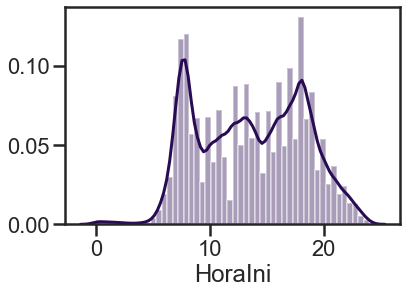

In [22]:
sns.distplot(trip_data.HoraIni / pd.Timedelta(hours=1))

In [23]:

trip_data['departure_time'] = trip_data.HoraIni / pd.Timedelta(hours=1)

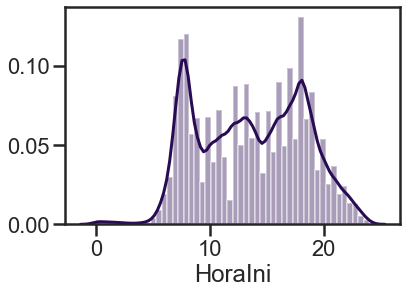

In [24]:
sns.distplot(trip_data.HoraIni / pd.Timedelta(hours=1))

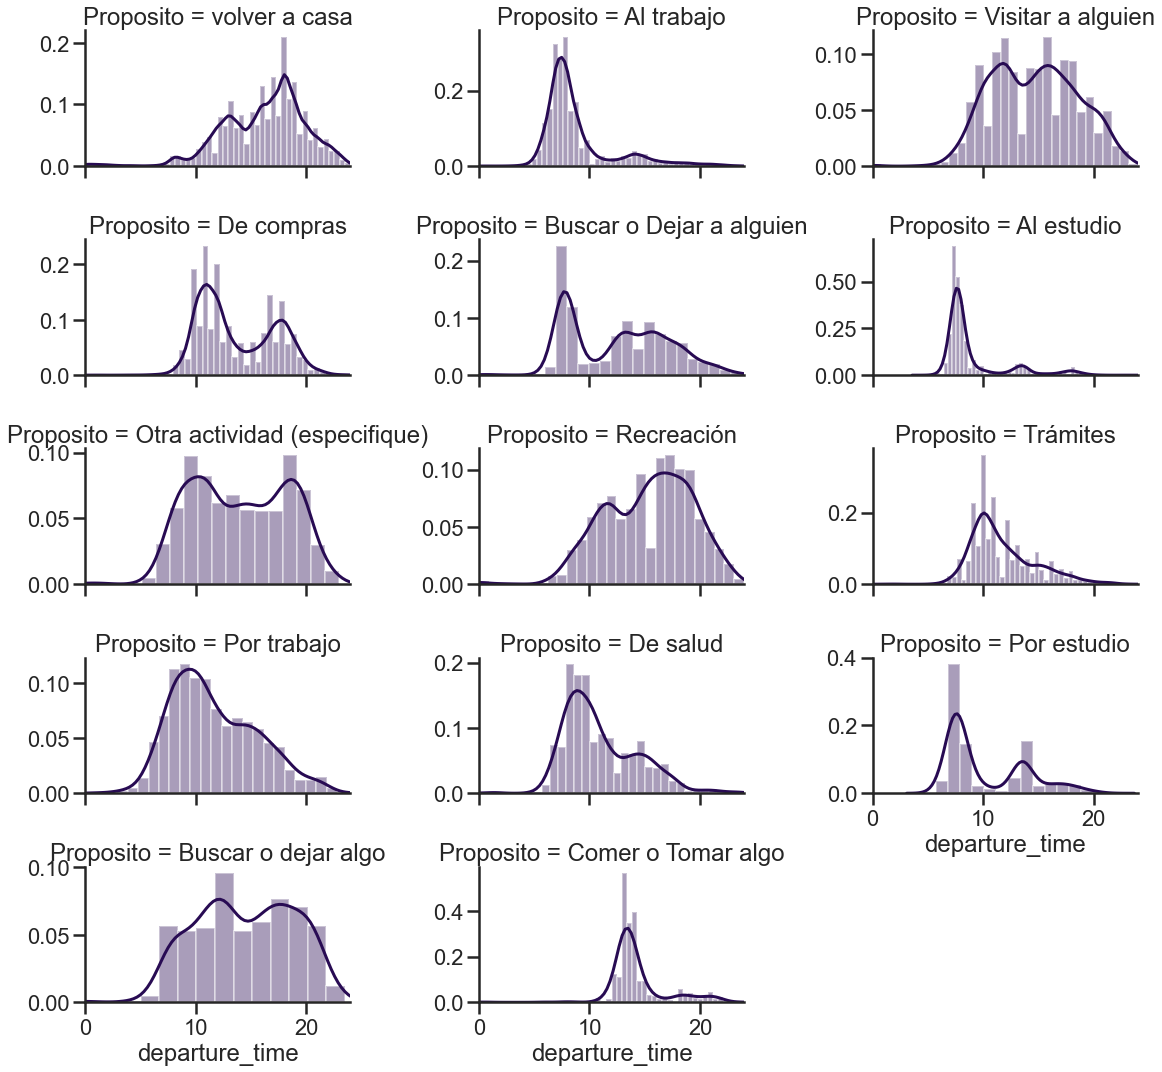

In [27]:
asdf = sns.FacetGrid(data=trip_data, col='Proposito', col_wrap=3, sharey=False, aspect=1.75, height=3)
asdf.map(sns.distplot, 'departure_time')
asdf.set(xlim=(0,24))

In [28]:
people_data = (pd.read_csv('./carto-en-python/input/2012_eod_stgo/EOD_STGO/personas.csv', sep=';', index_col='Persona')
               .assign(Sexo=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Sexo.csv', 'Sexo', sep=';'))
               .assign(Relacion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Relacion.csv', 'Relacion', sep=';'))
               .assign(Ocupacion=lambda x: decode_column(x, './carto-en-python/input/2012_eod_stgo/EOD_STGO/Tablas_parametros/Ocupacion.csv', 'Ocupacion', sep=';'))
              )
people_data.head()

,Hogar,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,Curso,Actividad,Ocupacion,ActividadEmpresa,JornadaTrabajo,DondeEstudia,DirActividadCoordX,DirActividadCoordY,DirEstudiosCoordX,DirEstudiosCoordY,NoViaja,TarjetaBip,Tarjeta2Bip,MedioViajeRestricion,ConoceTransantiago,NoUsaTransantiago,Discapacidad,TieneIngresos,Ingreso,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,Factor
Persona,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001001,100010,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,8.0,A,Empleado u obrero del sector privado,5.0,1.0,NaN,"338327,6800","6264794,3284",NaN,NaN,NaN,NaN,NaN,NaN,2.0,G,J,1,240000,2,240000,2,0,NaN,NaN,"1668,26000",NaN,NaN,"82,58553"
10001002,100010,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,G,J,2,0,0,0,0,0,NaN,NaN,"852,11370",NaN,NaN,"99,53422"
10001003,100010,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,4.0,A,Empleado u obrero del sector privado,5.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,99.0,NaN,NaN,1.0,H,J,1,99,2,210845,2,2,NaN,NaN,"1609,16300",NaN,NaN,"151,59367"
10002001,100020,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,8.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3677166.0,NaN,NaN,1.0,H,I,1,133000,1,133000,1,0,"169,50230",NaN,NaN,NaN,NaN,"45,21325"
10002002,100020,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,8.0,A,Empleado u obrero del sector privado,1.0,1.0,NaN,"337428,2696","6265980,7179",NaN,NaN,NaN,NaN,NaN,NaN,2.0,H,J,1,193000,1,193000,1,0,"43,26765",NaN,NaN,NaN,NaN,"25,62248"


In [29]:
trip_data = trip_data.join(people_data.loc[:,('Sexo', 'Relacion', 'Ocupacion')], on='Persona')

In [30]:
trip_data.sample(5)

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada,departure_time,Sexo,Relacion,Ocupacion
Viaje,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2466610402,246661,24666104,1,SANTIAGO,RECOLETA,Centro,Norte,20,601,"346519,4688",6298873,"347731,3125","6301133,5",volver a casa,1.0,NaN,4,4,2,1,21:00:00,21:38:00,21:19,38.0,2.0,5.0,16.0,9.0,NaN,NaN,"1,12721985",NaN,NaN,NaN,Bip!,2565,3472,0,21.000000,Hombre,Hijo o Hija,Empleado u obrero del sector público (Gob. Cen...
1377100201,137710,13771002,1,LA FLORIDA,LA FLORIDA,Sur-Oriente,Sur-Oriente,229,225,352064,6286974,"351407,6563",6290063,Recreación,3.0,NaN,4,4,2,1,14:00:00,14:20:00,14:10,20.0,1.0,5.0,0.0,0.0,"1,12721985",NaN,NaN,NaN,NaN,0.0,Bip!,3158,3745,0,14.000000,Hombre,Cónyuge o pareja,NaN
2148610402,214861,21486104,1,PUDAHUEL,PUDAHUEL,Poniente,Poniente,521,521,NaN,NaN,NaN,NaN,volver a casa,2.0,NaN,8,17,5,2,15:20:00,15:35:00,15:27,15.0,1.0,5.0,15.0,2.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Caminata,481,-1,1,15.333333,Hombre,Hijo o Hija,NaN
2377610108,237761,23776101,1,QUILICURA,QUILICURA,Norte,Norte,543,552,"339304,0625",6307741,"340022,4063","6307904,5",volver a casa,3.0,NaN,8,17,5,2,15:40:00,15:50:00,15:45,10.0,1.0,5.0,99.0,99.0,NaN,NaN,NaN,"1,482103914",NaN,NaN,Caminata,737,882,0,15.666667,Mujer,Jefe(a) de Hogar,NaN
1043710103,104371,10437101,1,CERRILLOS,LA CISTERNA,Poniente,Sur,53,185,"341746,875",6290315,"345749,2813","6289301,5",Buscar o Dejar a alguien,3.0,NaN,1,1,1,1,15:40:00,15:54:00,15:47,14.0,1.0,5.0,0.0,0.0,"1,48210391",NaN,NaN,NaN,NaN,0.0,Auto,4129,5016,0,15.666667,Mujer,Jefe(a) de Hogar,NaN


Ahora podemos desagregar el gráfico por más variables:

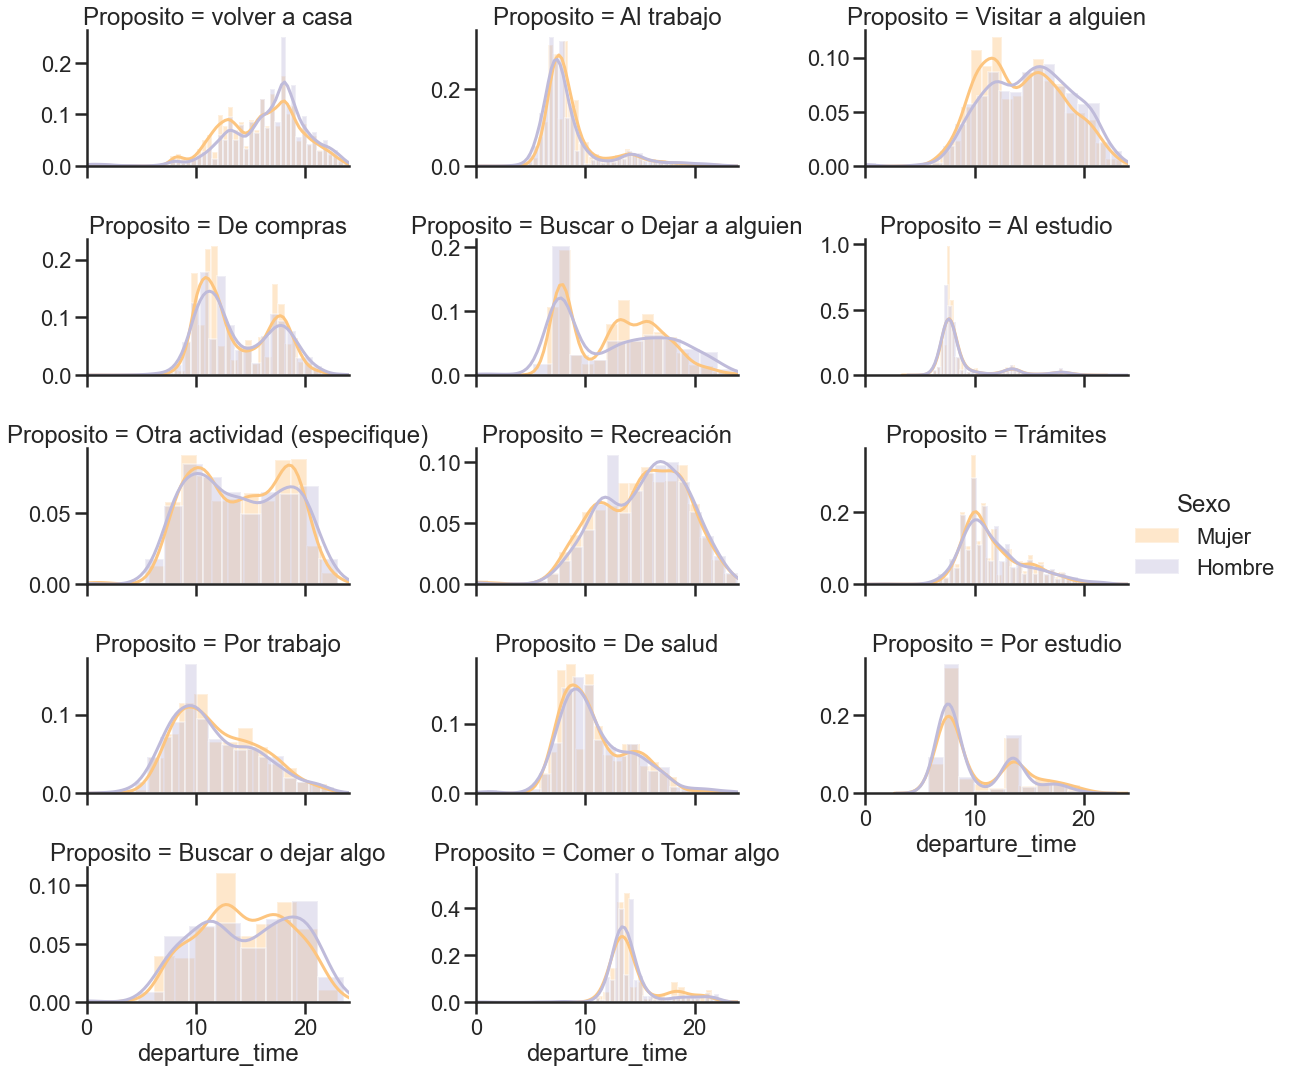

In [32]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Sexo', col_wrap=3, sharey=False, aspect=1.75, height=3, palette='PuOr')
g.map(sns.distplot, 'departure_time')
g.set(xlim=(0,24))
g.add_legend()

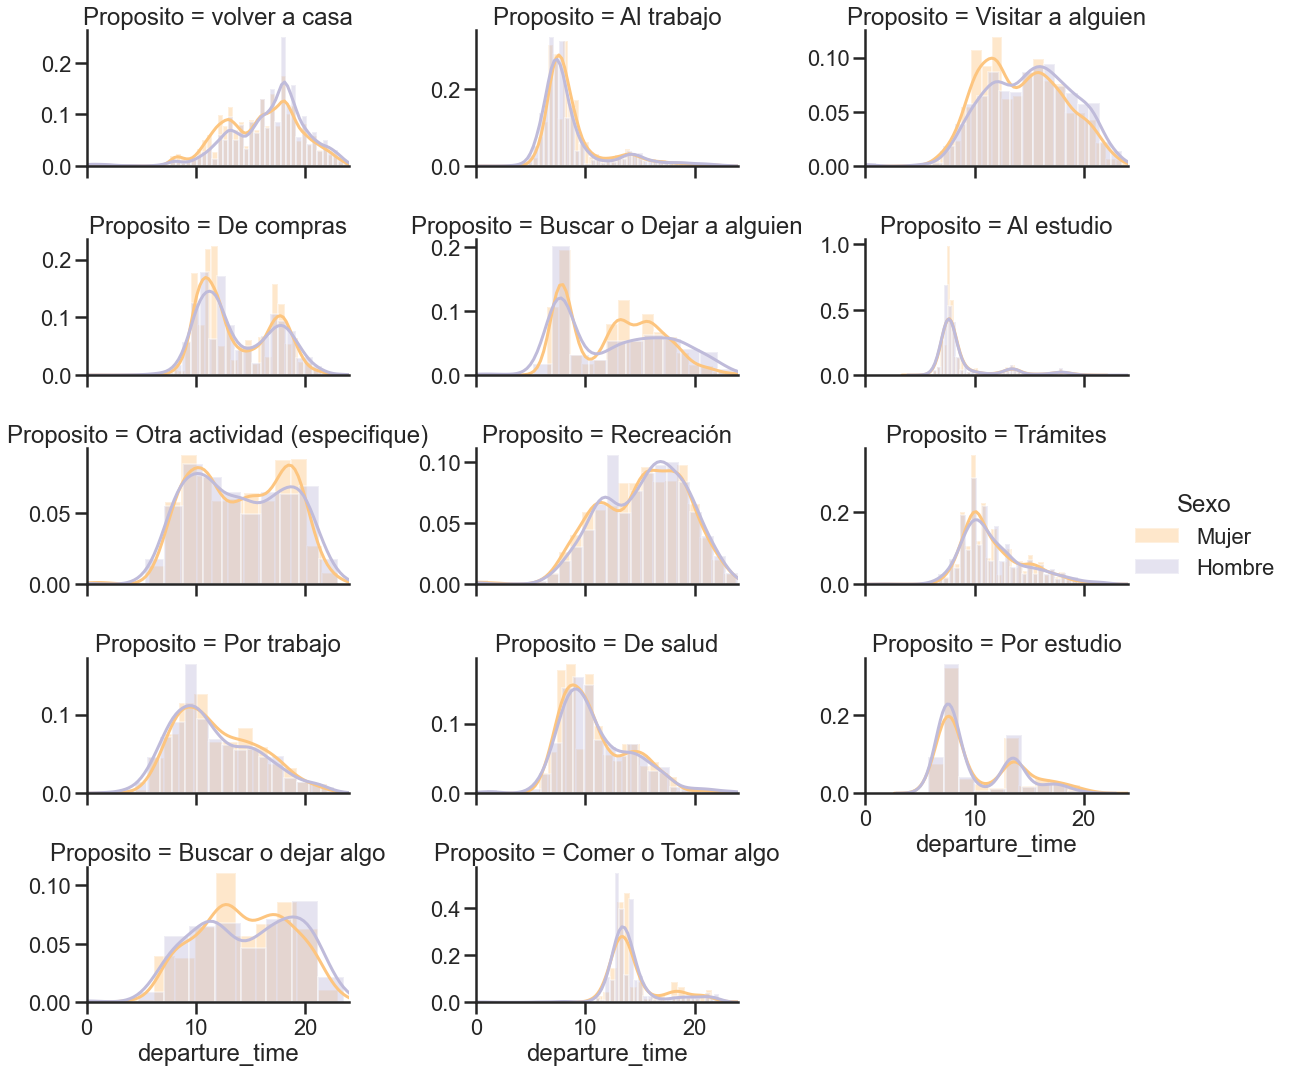

In [33]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Sexo', col_wrap=3, sharey=False, aspect=1.75, height=3, palette='PuOr')
g.map(sns.distplot, 'departure_time')
g.set(xlim=(0,24))
g.add_legend()

In [34]:
ocupations = trip_data.Ocupacion.value_counts()
ocupations

Empleado u obrero del sector privado                               35136
Trabajador por cuenta propia                                       10578
Enpleado u obrero de empresas públicas                              2155
Empleado u obrero del sector público (Gob. Central o Municipal)     1513
Servicio doméstico puertas afuera                                   1440
Patrón o empleador                                                  1426
Servicio doméstico puertas adentro                                   303
FF.AA. Y del Orden                                                   257
Familiar no remunerado                                                34
Name: Ocupacion, dtype: int64

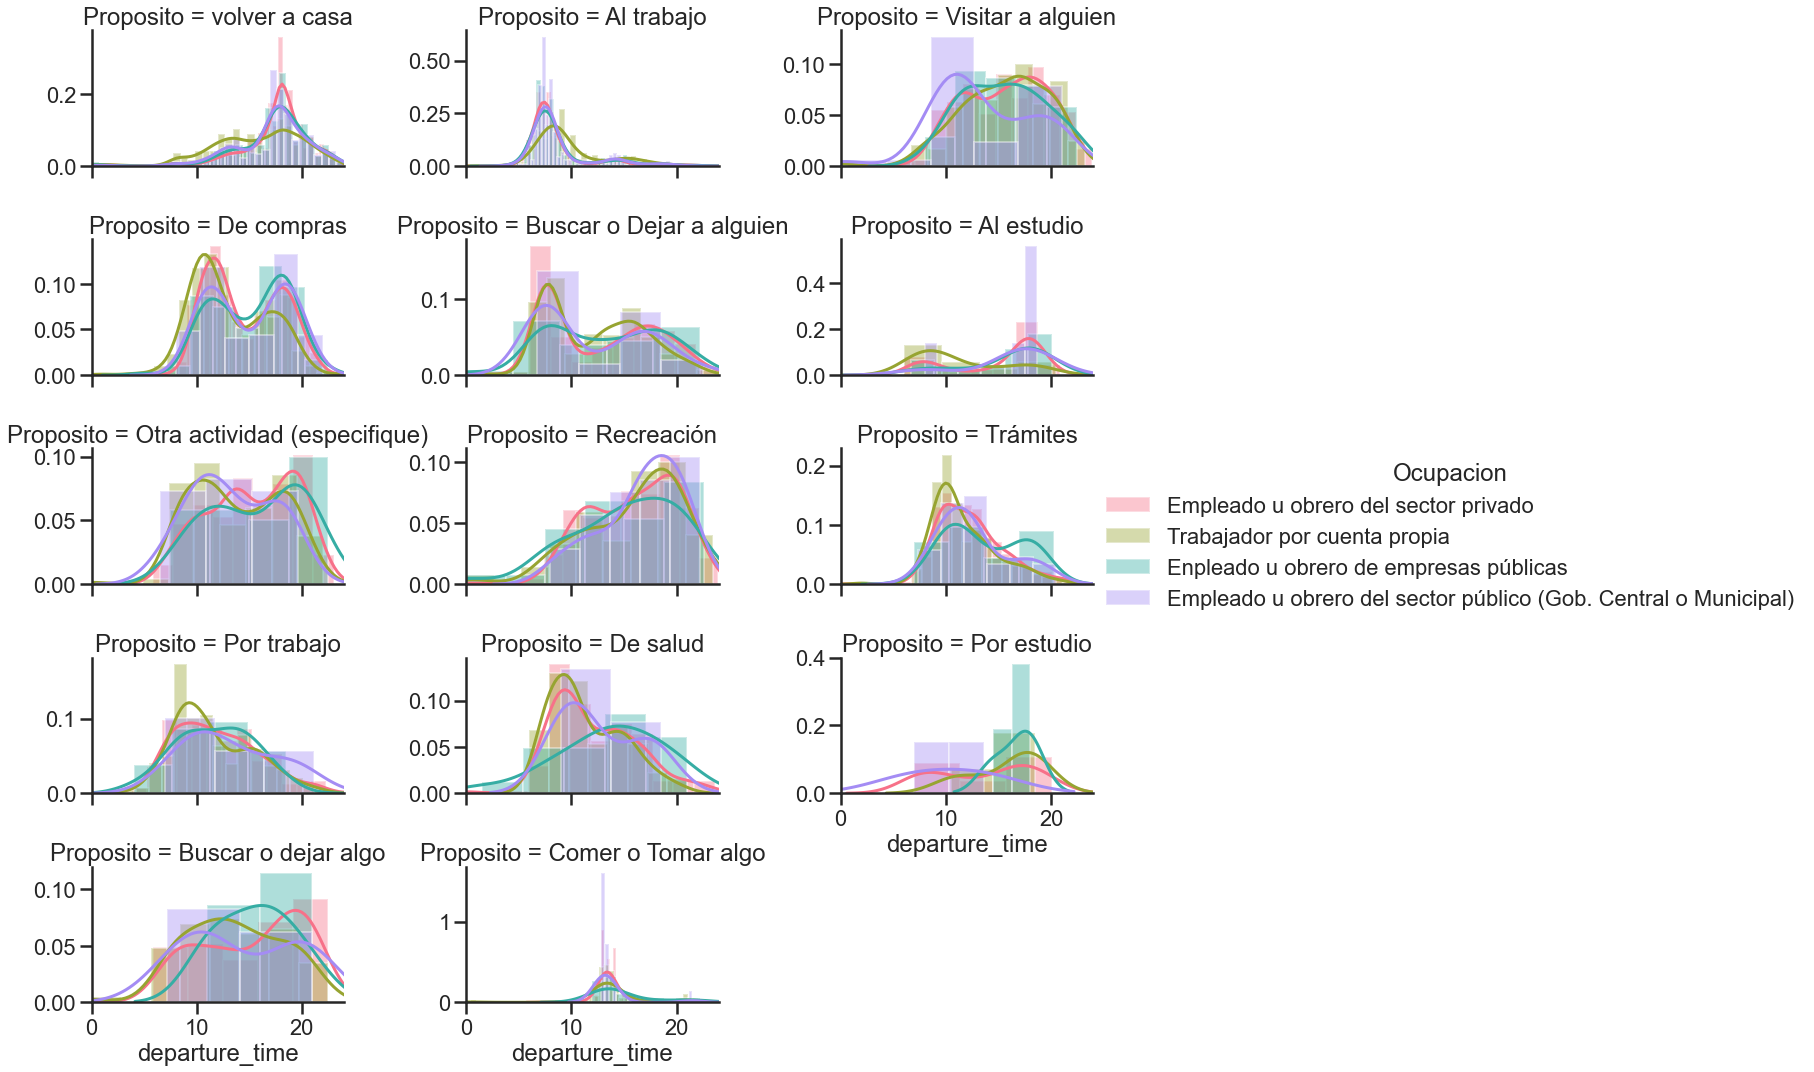

In [35]:
g = sns.FacetGrid(data=trip_data, col='Proposito', hue='Ocupacion', col_wrap=3, sharey=False, aspect=1.75, height=3, palette='husl',
                 hue_order=ocupations.index[0:4])
g.map(sns.distplot, 'departure_time')
g.set(xlim=(0,24))
g.add_legend()

Continuará ...